<img src="p4_ej5_enunciado.png" width="800" height="400">


#### Preparacion de data set

In [90]:
library(dplyr)

In [130]:
data(iris)
df = iris
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [16]:
df = select(df,Sepal.Width,Petal.Width,Species)
df$Species = as.factor(df$Species)

### a -

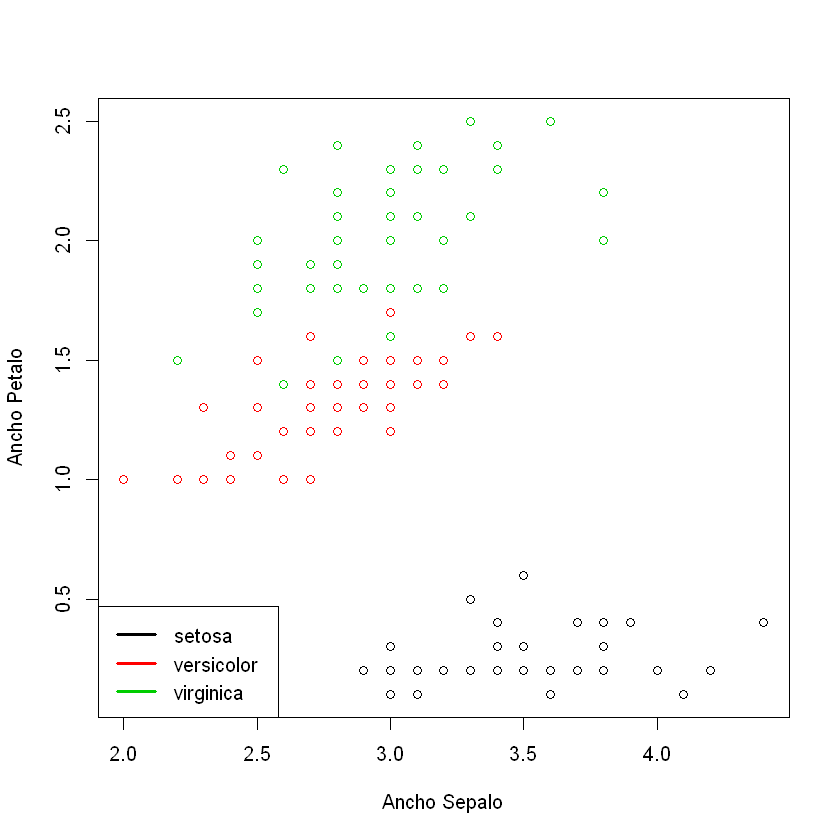

In [35]:
plot(df$Sepal.Width,df$Petal.Width,col=df$Species, xlab="Ancho Sepalo", ylab="Ancho Petalo")

legend("bottomleft", legend = unique(df$Species),
       lwd = 3, col=unique(df$Species))

In [ ]:
### agregrar el test para cada grupo
### mvShapiro --> bajar el .zip 

p value
1.119371e-11


p value
"Rechazo, no hay normalidad multivariada"


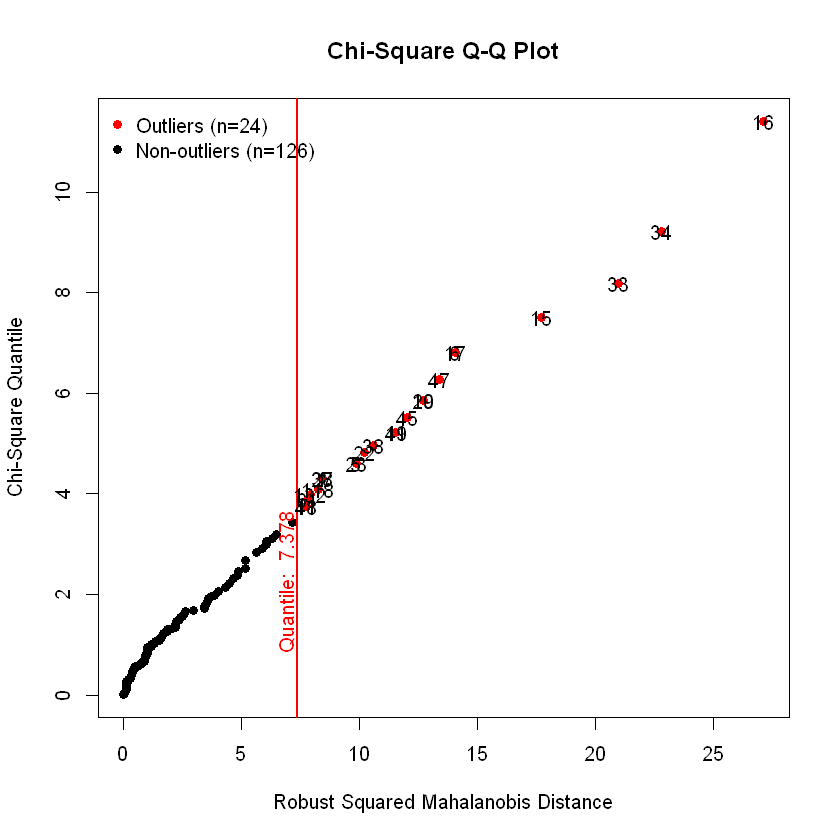

In [39]:
alfa = 0.001
library(MVN)
test = mvn(select(df,Sepal.Width,Petal.Width), mvnTest = "hz", multivariateOutlierMethod = "quan")
pvalue = test$multivariateNormality[3]
pvalue
ifelse(pvalue<alfa,"Rechazo, no hay normalidad multivariada","No rechazo, hay normalidad multivariada")

In [57]:
unique(df$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

### Test de igualdad de varianzas

In [81]:
p <- 2
k <- 3
s <- min(p,k-1) #Cantidad de coordenadas discriminantes: 2

In [85]:
n1 = nrow(df[df$Species=="setosa",])
n2 = nrow(df[df$Species=="versicolor",])
n3 = nrow(df[df$Species=="virginica",])
n = n1+n2+n3

In [83]:
q1 = (n1-1)*var(df[df$Species == "setosa",][,1:2])
q2 = (n2-1)*var(df[df$Species == "versicolor",][,1:2])
q3 = (n3-1)*var(df[df$Species == "virginica",][,1:2])

u = q1+q2+q3
u

,Sepal.Width,Petal.Width
Sepal.Width,16.9620,4.8084
Petal.Width,4.8084,6.1566


In [88]:
xraya1 <- apply(df[df$Species == "setosa",][,1:2], 2, mean)
xraya2 <- apply(df[df$Species == "versicolor",][,1:2], 2, mean)
xraya3 <- apply(df[df$Species == "virginica",][,1:2], 2, mean)

xraya <- (1/n)*(n1*xraya1+n2*xraya2+n3*xraya3)


H <- n1*(xraya1-xraya)%*%t(xraya1-xraya)+n2*(xraya2-xraya)%*%t(xraya2-xraya)+n3*(xraya3-xraya)%*%t(xraya3-xraya)

xraya

H

Sepal.Width Petal.Width 
   3.057333    1.199333

Sepal.Width,Petal.Width
11.34493,-22.93267
-22.93267,80.41333


### Finalmente recordando el test se tiene

<img src="test_igualdad_var_cov.png" width="800" height="400">



Con 


<img src="k_alfa.png" width="200" height="200">



#### Forma exacta

In [132]:
gamma <- (det(q1/n1)^(n1/2)*det(q2/n2)^(n2/2)*det(q3/n3)^(n3/2))/(det(u/n)^(n/2))
gl <- p*k+p*(p+1)*(k/2)

k_alfa = (-1/(n*p))*exp(qchisq(alfa, df=gl) )

ifelse(gamma<k_alfa,"Rechazo Ho, no puedo asumir igualdad de matrices de covarianza","No rechazo Ho, puedo asumir igualdad de matrices de covarianzas")


[1] "No rechazo Ho, puedo asumir igualdad de matrices de covarianzas"

Para calcular el p valor conviene despejar desde gamma < k_alfa, entonces el p valor viene dado por

P(chi< - np ln(gamma)) entonces

In [133]:
p_valor_exacto = pchisq(-n*p*log(gamma), df=gl)
p_valor_exacto

[1] 1

#### Forma aproximada, aca usamos la convergencia en distribucion de -2log(gamma) a una chi cuadrado

In [135]:
gamma <- (det(q1/n1)^(n1/2)*det(q2/n2)^(n2/2)*det(q3/n3)^(n3/2))/(det(u/n)^(n/2))
gamma_log = -2*log(gamma)

gl <- p*k+p*(p+1)*k/2-(p*k+p*(p+1)/2)

pvalor <- 1-pchisq(gamma_log, gl, ncp=0, lower.tail = FALSE)

pvalor

ifelse(pvalor>alfa,"No rechazo Ho, puedo asumir igualdad de matrices de covarianzas",
       "Rechazo Ho, no puedo asumir igualdad de matrices de covarianza")
# A nivel 0.01 no rechazo igualdad de varianzas entre las especies versi y virgi

[1] 1

[1] "No rechazo Ho, puedo asumir igualdad de matrices de covarianzas"

### b -

### Test igualdad de medias suponiendo igualdad en las covarianzas

#### Recordando lo visto en clase, el test cociente de verosimilitud viene dado por

<img src="test_igualdad_medias(igualcov_).png" width="800" height="400">


#### Forma Exacta

In [122]:
gammab <- (det(u)/(det(u+H)))^{n/2}

gl <- p*k+p*(p+1)*(k/2)

k_alfa = (-1/(n*p))*exp(qchisq(alfa, df=gl) )

ifelse(gamma<k_alfa,"Rechazo Ho, al menos una media es distinta","No rechazo Ho, todas las medias son iguales")

p_valor_exacto = pchisq(-n*p*log(gamma), df=gl)
p_valor_exacto

[1] "No rechazo Ho, todas las medias son iguales"

[1] 1

#### Forma Aproximada

In [129]:
gl <- p*k+p*(p+1)/2-(p+p*(p+1)/2)

gamma_logb = -2*log(gammab)

pvalor <-  pchisq(gamma_log, gl, ncp=0, lower.tail = FALSE)

ifelse(pvalor<alfa,"Rechazo Ho, al menos una media es distinta","No rechazo Ho, todas las medias son iguales")

pvalor


[1] "No rechazo Ho, todas las medias son iguales"

[1] 1